# Chapter 3
## Classification

### MNIST

In [1]:
from sklearn.datasets import fetch_openml

# Example: Fetch MNIST dataset
mnist = fetch_openml('mnist_784', version=1)


In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

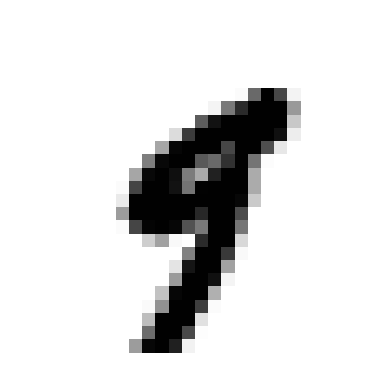

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

X = np.array(X)
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
 interpolation="nearest")
plt.axis("off")
plt.show()

In [4]:
#train and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
#shuffle the train set to ensure all folds contain all digits
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Training a Binary Classifier

In [6]:
y = y.astype(np.int8)
y_train_5 = (y_train == '5') # True for all 5s, False for all other digits.
y_test_5 = (y_test == '5')
y_train_5

27626    False
25701    False
3126      True
2962     False
53556    False
         ...  
16306    False
1024      True
39927    False
9711     False
36864    False
Name: class, Length: 60000, dtype: bool

In [7]:
#training using stochastic gradient descent (SGD)
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [8]:
sgd_clf.predict([X_train[20000]])

array([False])

In [9]:
#using cross val to check the accuracy
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96895, 0.96615, 0.96915])

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
for train_index, test_index in skfolds.split(X_train, y_train_5):
 clone_clf = clone(sgd_clf)
 X_train_folds = X_train[train_index]
 y_train_folds = (y_train_5[train_index])
 X_test_fold = X_train[test_index]
 y_test_fold = (y_train_5[test_index])
 clone_clf.fit(X_train_folds, y_train_folds)
 y_pred = clone_clf.predict(X_test_fold)
 n_correct = sum(y_pred == y_test_fold)
 print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495

0.8658
0.8886
0.7721


### confusion matrix

In [11]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53780,   799],
       [ 1116,  4305]])

### precision and recall

In [13]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 4344 / (4344 + 1307)
recall_score(y_train_5, y_train_pred)

np.float64(0.7941339236303265)

In [14]:
#f1 score, harmonic mean of precision and recall
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

np.float64(0.8180522565320665)

In [15]:
### tradeoff using threshold value
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-7801.93176142])

In [16]:
threshold = -5000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [17]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [18]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
 method="decision_function")

In [19]:
#precision recall curve
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [20]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 plt.xlabel("Threshold")
 plt.legend(loc="upper left")
 plt.ylim([0, 1])

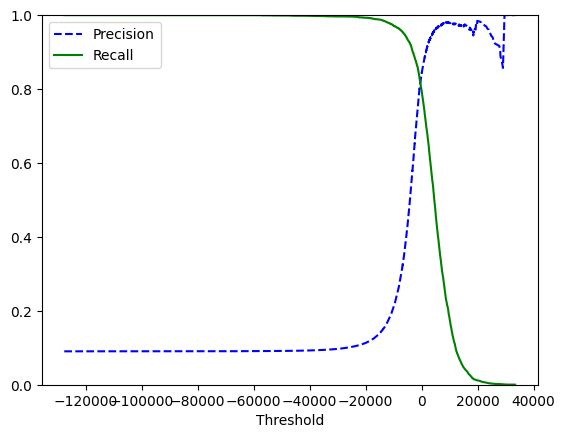

In [21]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### ROC curve

In [22]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [23]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--')
 plt.axis([0, 1, 0, 1])
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')

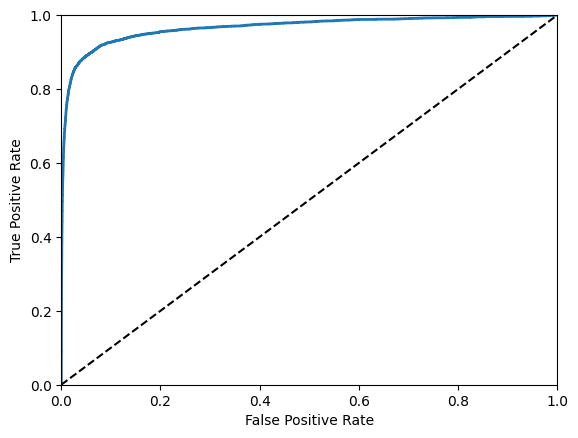

In [24]:
plot_roc_curve(fpr, tpr)
plt.show()

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

np.float64(0.9665243903038737)

### ROC for randomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
 method="predict_proba")

In [27]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

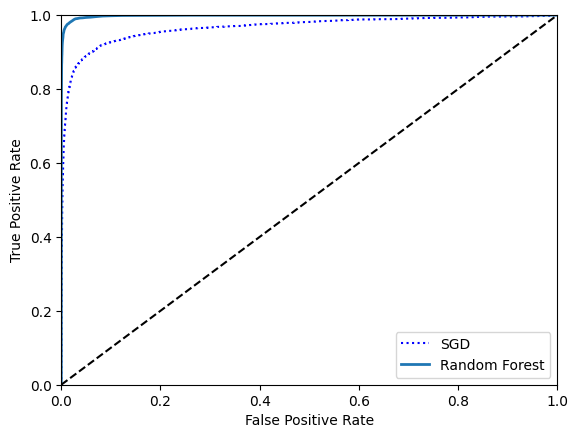

In [28]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [29]:
roc_auc_score(y_train_5, y_scores_forest)

np.float64(0.9984517550667786)

## MultiClass Classification

# Exercises

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [31]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()